In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
census2009 = pd.read_csv("F:\Citadel Datathon\Data\census2009.csv",index_col=0)
census2010 = pd.read_csv("F:\Citadel Datathon\Data\census2010.csv",index_col=0)
census2011 = pd.read_csv("F:\Citadel Datathon\Data\census2011.csv",index_col=0)
census2012 = pd.read_csv("F:\Citadel Datathon\Data\census2012.csv",index_col=0)
census2013 = pd.read_csv("F:\Citadel Datathon\Data\census2013.csv",index_col=0)
census2014 = pd.read_csv("F:\Citadel Datathon\Data\census2014.csv",index_col=0)
census2015 = pd.read_csv("F:\Citadel Datathon\Data\census2015.csv",index_col=0)
census2016 = pd.read_csv("F:\Citadel Datathon\Data\census2016.csv",index_col=0)
census2017 = pd.read_csv("F:\Citadel Datathon\Data\census2017.csv",index_col=0)
census2018 = pd.read_csv("F:\Citadel Datathon\Data\census2018.csv",index_col=0)
counties = pd.read_csv("F:\Citadel Datathon\Data\Counties.csv",index_col=0)

## Data Cleaning

In [3]:
len(set(census2009.geoid) -set(census2010.geoid))

561

In [4]:
len(set(census2010.geoid) -set(census2018.geoid))

1

The tracts in 2009 are totally different from those between 2010and 2019 because the US Government updated its census tracts every decade. Therefore, we use census data from 2010 to 2018 only

In [5]:
census = pd.concat([census2010,census2011,census2012,census2013,census2014,census2015,census2016,census2017,census2018])

In [7]:
census = census.rename(columns={ 'B01001_001E': 'total_population', 
                        'B19013_001E' : 'median_household_income',
                        'B25077_001E': 'median_home_value',
                        'B03002_003E': 'no_of_non-Hispanic_Caucasians', 
                        'B03002_004E': 'no_of_non-Hispanic_blacks_or_African_Americans',
                        'B02001_004E': 'no_of_American_Indians_and_Alaskans', 
                        'B03002_006E': 'no_of_non-Hispanic_Asians', 
                        'B03002_007E': 'no_of_non-Hispanic_Hawaiians_or_Pacific_Islanders', 
                        'B03002_008E': 'no_of_non-Hispanic_others',
                        'B03002_009E': 'no_of_non-Hispanic multi-racials', 
                        'B03002_012E': 'no_of_Hispanics_or_Latinos',
                        'state': 'state_code',
                        'county': 'county_code'
                      })
null_census = (census.isnull().sum(axis = 0)/len(census)).sort_values(ascending=False)
null_census

median_home_value                                    0.001868
median_household_income                              0.000165
tract                                                0.000000
no_of_non-Hispanic_blacks_or_African_Americans       0.000000
year                                                 0.000000
NAME                                                 0.000000
total_population                                     0.000000
no_of_non-Hispanic_Caucasians                        0.000000
no_of_American_Indians_and_Alaskans                  0.000000
county_code                                          0.000000
no_of_non-Hispanic_Asians                            0.000000
no_of_non-Hispanic_Hawaiians_or_Pacific_Islanders    0.000000
no_of_non-Hispanic_others                            0.000000
no_of_non-Hispanic multi-racials                     0.000000
no_of_Hispanics_or_Latinos                           0.000000
state_code                                           0.000000
geoid   

In [8]:
census = census.dropna()

The amount of missing value are really small so we can just drop it 

In [9]:
df = pd.merge(census, counties, on=['state_code', 'county_code'])

In [10]:
df.describe()

,geoid,year,total_population,median_household_income,median_home_value,no_of_non-Hispanic_Caucasians,no_of_non-Hispanic_blacks_or_African_Americans,no_of_American_Indians_and_Alaskans,no_of_non-Hispanic_Asians,no_of_non-Hispanic_Hawaiians_or_Pacific_Islanders,no_of_non-Hispanic_others,no_of_non-Hispanic multi-racials,no_of_Hispanics_or_Latinos,state_code,county_code,tract
count,4.221700e+04,42217.000000,42217.000000,4.221700e+04,4.221700e+04,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000,42217.000000
mean,3.545991e+10,2013.997916,4211.514864,-1.196009e+07,-3.239314e+07,2047.350735,666.913068,12.404742,428.243812,1.022811,24.932089,62.537177,974.550158,35.407916,51.871213,121087.361371
std,1.028554e+09,2.584244,2003.565301,8.876483e+07,1.443914e+08,1799.981066,1039.490667,33.212418,670.584400,8.817928,75.816708,73.422152,1178.210618,1.008870,32.619244,208574.309351
min,3.400300e+10,2010.000000,0.000000,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.000000,100.000000
25%,3.403118e+10,2012.000000,2818.000000,4.576900e+04,3.111000e+05,412.000000,42.000000,0.000000,53.000000,0.000000,0.000000,11.000000,246.000000,34.000000,25.000000,13001.000000
50%,3.604706e+10,2014.000000,4013.000000,6.771700e+04,4.197000e+05,1699.000000,192.000000,0.000000,189.000000,0.000000,0.000000,40.000000,536.000000,36.000000,47.000000,36700.000000
75%,3.608103e+10,2016.000000,5381.000000,9.428600e+04,5.666000e+05,3244.000000,867.000000,10.000000,514.000000,0.000000,20.000000,89.000000,1201.000000,36.000000,81.000000,112400.000000
max,4.210395e+10,2018.000000,29256.000000,2.500010e+05,2.000001e+06,13699.000000,17123.000000,674.000000,10580.000000,326.000000,1378.000000,1002.000000,13784.000000,42.000000,119.000000,990400.000000


The mean house income and home value is negative which is not reasonable

In [13]:
df[(df['median_household_income'] < 0) | (df['median_home_value'] < 0) | (df['total_population'] <= 0)]

,geoid,year,NAME,total_population,median_household_income,median_home_value,no_of_non-Hispanic_Caucasians,no_of_non-Hispanic_blacks_or_African_Americans,no_of_American_Indians_and_Alaskans,no_of_non-Hispanic_Asians,no_of_non-Hispanic_Hawaiians_or_Pacific_Islanders,no_of_non-Hispanic_others,no_of_non-Hispanic multi-racials,no_of_Hispanics_or_Latinos,state_code,county_code,tract,county_name
1139,34003023401,2016,"Census Tract 234.01, Bergen County, New Jersey",3857.0,71197.0,-666666666.0,989.0,838.0,74.0,1243.0,0.0,30.0,100.0,653.0,34,3,23401,"Bergen, NJ"
1720,34013013000,2010,"Census Tract 130, Essex County, New Jersey",2294.0,45526.0,-666666666.0,85.0,1969.0,0.0,56.0,0.0,3.0,56.0,125.0,34,13,13000,"Essex, NJ"
1819,34013980100,2010,"Census Tract 9801, Essex County, New Jersey",1949.0,-666666666.0,-666666666.0,239.0,1328.0,7.0,15.0,0.0,0.0,0.0,360.0,34,13,980100,"Essex, NJ"
1820,34013980200,2010,"Census Tract 9802, Essex County, New Jersey",879.0,-666666666.0,-666666666.0,157.0,422.0,7.0,0.0,0.0,0.0,0.0,300.0,34,13,980200,"Essex, NJ"
1930,34013013000,2011,"Census Tract 130, Essex County, New Jersey",2154.0,44725.0,-666666666.0,80.0,1802.0,0.0,58.0,0.0,10.0,70.0,134.0,34,13,13000,"Essex, NJ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42003,36119981000,2018,"Census Tract 9810, Westchester County, New York",2026.0,38529.0,-666666666.0,564.0,624.0,32.0,343.0,0.0,21.0,10.0,454.0,36,119,981000,"Westchester, NY"
42004,36119982000,2018,"Census Tract 9820, Westchester County, New York",1702.0,-666666666.0,-666666666.0,209.0,941.0,0.0,38.0,0.0,0.0,37.0,477.0,36,119,982000,"Westchester, NY"
42005,36119983000,2018,"Census Tract 9830, Westchester County, New York",1308.0,-666666666.0,-666666666.0,471.0,472.0,7.0,13.0,0.0,0.0,95.0,250.0,36,119,983000,"Westchester, NY"
42006,36119984000,2018,"Census Tract 9840, Westchester County, New York",428.0,46346.0,-666666666.0,227.0,172.0,0.0,0.0,0.0,0.0,6.0,23.0,36,119,984000,"Westchester, NY"


We need drope these the out of range values and outliers. 

In [17]:
df = df[(df['median_household_income'] > 0) & (df['median_home_value'] > 0) & (df['total_population'] > 0) ]

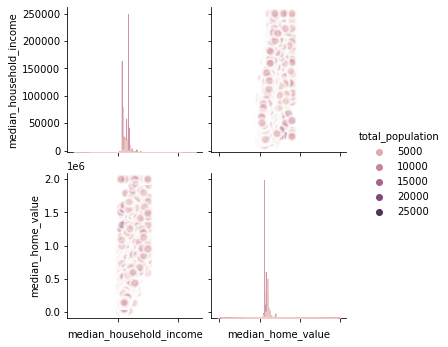

In [18]:
g = sns.pairplot(df[['median_household_income','median_home_value' ,'total_population']], 
                 hue='total_population', 
                 plot_kws=dict(s=80, linewidth=2.5, alpha=0.6))
g.set(xticklabels=[])

<AxesSubplot:xlabel='year', ylabel='median_home_value'>

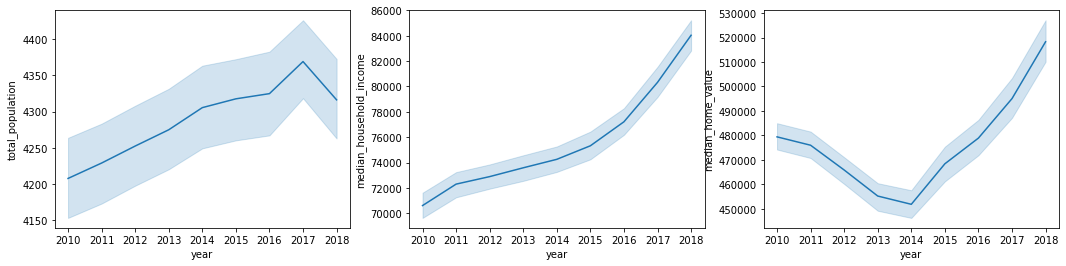

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.lineplot(data= df, x=df['year'], y=df['total_population'], ax = ax[0])
sns.lineplot(data= df, x=df['year'], y=df['median_household_income'], ax = ax[1])
sns.lineplot(data= df, x=df['year'], y=df['median_home_value'], ax = ax[2])

In [20]:
#Discover and visualize the data to gain insights
print('Variable', '         ', 'count of unique value','                   ', 'content')
for column in df.columns:
    uniques = df[column].unique()
    print('{0:30s} {1:4d}\t'.format(column, len(uniques)), uniques[:3])

Variable           count of unique value                     content
geoid                          4551	 [34003001000 34003002100 34003002200]
year                              9	 [2010 2011 2012]
NAME                           4551	 ['Census Tract 10, Bergen County, New Jersey'
 'Census Tract 21, Bergen County, New Jersey'
 'Census Tract 22, Bergen County, New Jersey']
total_population               8074	 [6489. 1926. 5104.]
median_household_income        27798	 [131563. 172054.  87270.]
median_home_value              8323	 [ 741400. 1000001.  530300.]
no_of_non-Hispanic_Caucasians  6604	 [5523. 1217. 3518.]
no_of_non-Hispanic_blacks_or_African_Americans 4095	 [73. 31. 13.]
no_of_American_Indians_and_Alaskans  334	 [ 0.  7. 16.]
no_of_non-Hispanic_Asians      2978	 [ 676.  509. 1136.]
no_of_non-Hispanic_Hawaiians_or_Pacific_Islanders  148	 [ 0. 16. 30.]
no_of_non-Hispanic_others       632	 [50.  0. 18.]
no_of_non-Hispanic multi-racials  517	 [41.  9. 40.]
no_of_Hispanics_or_Latinos  

## Hypothesis
- Null hypothesis: 
1. The tract had a population of at least 500 residents at the beginning and end of a decade and was located within a central city. 
2. The tract’s median household income and home value were in the bottom __40th__ percentile when compared to all tracts within its metro area at the beginning of the decade.  
3. Home value growth per tract was in  __25%__ of all tracts within a metro area. 

In [21]:
def gentrifiedtract(bottom_threshold, up_threshold, last_year):
    #step 1 & 2
    df_2010 = df[(df['year'] == 2010)]
    df1 = df_2010.sort_values('median_household_income', ascending = True)[:int(len(df_2010)*bottom_threshold)]['geoid']
    df2 = df_2010.sort_values('median_home_value', ascending = True)[:int(len(df_2010)*bottom_threshold)]['geoid']
    df3 = df_2010.sort_values('total_population', ascending = True)
    df3 = df3[df3['total_population'] > 500]['geoid']

    bottom_40 = len((set(df1) & set(df2) & set(df3)))
    
    #step 3
    df_2018 = df[(df['year'] == last_year)]
    df_2018_new = df_2018.groupby('geoid')['median_household_income','median_home_value'].median() / df_2010.groupby('geoid')['median_household_income','median_home_value'].median()
    df_2018_new = df_2018_new.dropna()
    up25_home_value = df_2018_new.sort_values('median_home_value', ascending=False)[:int(len(df_2018_new)*up_threshold)]
    
    #save to csv file
    gentrified_tract = pd.DataFrame(set(up25_home_value.index) & (set(df1) & set(df2) & set(df3)))
    gentrified_tract =gentrified_tract.rename(columns = {0:'geoid'})
    gentrified_tract1 = pd.merge(df_2018, gentrified_tract, how='right', on=['geoid'])
    gentrified_tract1 = gentrified_tract1[['tract','geoid']]
    gentrified_tract1.to_csv(str(last_year) + '_' +'gentrified_tract.csv')
    return gentrified_tract1

In [25]:
bottom_threshold, up_threshold, last_year = 0.4, 0.25, 2018

In [26]:
for i in range(2011, 2019):
    gentrifiedtract(bottom_threshold, up_threshold, i)

In [27]:
df_2010 = df[(df['year'] == 2010)]
df1 = df_2010.sort_values('median_household_income', ascending = True)[:int(len(df_2010)*bottom_threshold)]['geoid']
df2 = df_2010.sort_values('median_home_value', ascending = True)[:int(len(df_2010)*bottom_threshold)]['geoid']
df3 = df_2010.sort_values('total_population', ascending = True)
df3 = df3[df3['total_population'] > 500]['geoid']

bottom_40 = len((set(df1) & set(df2) & set(df3)))

858

In [30]:
Gentrified_tracts_1 = pd.read_csv("F:/Citadel Datathon/Data/Gentrified tracts_1.csv", index_col=0)

In [31]:
getrified_tract_2018 = pd.DataFrame(gentrifiedtract(bottom_threshold, up_threshold, last_year).index)

In [40]:
no_gentrified_tract = []
did_not_gentrified_tract = []
not_eligible_to_gentrify = []
total_census_tracts = []
year = [i for i in range(2011, 2019)]
for i in year:
    df_total_distinct_tract = len(df[(df['year'] == i)]['geoid'].unique())
    no_gentrified_tract.append(len(Gentrified_tracts_1[Gentrified_tracts_1['Year'] == i]))
    did_not_gentrified_tract.append(bottom_40 - len(Gentrified_tracts_1[Gentrified_tracts_1['Year'] == i]))
    not_eligible_to_gentrify.append((df_total_distinct_tract) - len(Gentrified_tracts_1[Gentrified_tracts_1['Year'] == i]))
    total_census_tracts.append(df_total_distinct_tract)

gentrified_tract_sum = pd.DataFrame({'Year': year, 'Gentrified Tract': no_gentrified_tract, 'Did Not Gentrify': did_not_gentrified_tract,
                                    'Not Eligible to Gentrify': not_eligible_to_gentrify, 'Total Census Tracts': total_census_tracts})
gentrified_tract_sum['Share of gentrified tracts (%)'] = [round((int(b) / int(m))*100, 2) for b,m in zip(no_gentrified_tract, did_not_gentrified_tract)]
gentrified_tract_sum['Share of overall gentrified tracts (%)'] = [round((int(b) / int(m))*100, 2) for b,m in zip(no_gentrified_tract, total_census_tracts)]

In [41]:
gentrified_tract_sum

,Year,Gentrified Tract,Did Not Gentrify,Not Eligible to Gentrify,Total Census Tracts,Share of gentrified tracts (%),Share of overall gentrified tracts (%)
0,2011,300,558,4200,4500,53.76,6.67
1,2012,299,559,4204,4503,53.49,6.64
2,2013,318,540,4160,4478,58.89,7.10
3,2014,314,544,4167,4481,57.72,7.01
4,2015,223,635,4184,4407,35.12,5.06
5,2016,220,638,4195,4415,34.48,4.98
6,2017,221,637,4217,4438,34.69,4.98
7,2018,211,647,4199,4410,32.61,4.78


A summary of gerntrified tract across the whole period

### Using extra data including the educational attainment

In [43]:
#Input the extra data 
education_2018 = pd.read_csv("F:/Citadel Datathon/Data/Education2018.csv", index_col=0)
education_2018 = education_2018.rename(columns = {'GeoID':'geoid'})
education_2018 = education_2018.drop(columns= ['State', 'County', 'Tract'])

In [49]:
df_2018 = df[(df['year'] == 2018)]
df_2018 = pd.merge(left= df_2018, right = education_2018, how ='outer', on = ['geoid'])
df_2018 = df_2018.drop(columns = ['year', 'NAME', 'county_name','state_code'])
gentrifiedtract(0.4, 0.25, 2018)
getrified = []
for i in df_2018['geoid']:
    if i in pd.DataFrame(gentrified_tract1).values:
        getrified.append(1)
    else:
        getrified.append(0)
df_2018['getrified'] = getrified

In [50]:
df_2018 = df_2018.rename(columns={
                        'geoid' : 'Geoid',
                        'total_population': 'Total Population', 
                        'median_household_income': 'Median Household Income',
                        'median_home_value' : 'Median Home Value',
                        'no_of_non-Hispanic_Caucasians' : 'Number of Non-Hispanic Caucasians', 
                        'no_of_non-Hispanic_blacks_or_African_Americans' : 'Number of Non-Hispanic Blacks or African Americans',
                        'no_of_American_Indians_and_Alaskans' : 'Number of American Indians and Alaskans', 
                        'no_of_non-Hispanic_Asians': 'Number of Non-Hispanic Asians', 
                        'no_of_non-Hispanic_Hawaiians_or_Pacific_Islanders' : 'Number of Non-Hispanic Hawaiians or Pacific Islanders', 
                        'no_of_non-Hispanic_others' : 'Number of Non-Hispanic_others',
                        'no_of_non-Hispanic multi-racials': 'Number of Non-Hispanic Multi-racials', 
                        'no_of_Hispanics_or_Latinos' : 'Number of Non-Hispanics or Latinos',
                        'county_code': 'County',
                        'tract': 'Tract',
                        'Total Population 18 to 24 years': 'Total Pop (18-24 years old)',
                        "Total Population 18 to 24 years Bachelor's degree or higher": "Total Pop with Bachelor's degree or higher (18-24 years old)",
                        "Total Population 25 years and over": 'Total Pop (> 25 years old)',
                        "Total Population 25 years and over Bachelor's degree or higher": "Total Pop with Bachelor's degree or higher (> 25 years old)",                      
                        "getrified" : 'Getrified'
                      })

In [51]:
df_2018 = df_2018.dropna()
df_2018

,Geoid,Total Population,Median Household Income,Median Home Value,Number of Non-Hispanic Caucasians,Number of Non-Hispanic Blacks or African Americans,Number of American Indians and Alaskans,Number of Non-Hispanic Asians,Number of Non-Hispanic Hawaiians or Pacific Islanders,Number of Non-Hispanic_others,Number of Non-Hispanic Multi-racials,Number of Non-Hispanics or Latinos,County,Tract,Total Pop (18-24 years old),Total Pop with Bachelor's degree or higher (18-24 years old),Total Pop (> 25 years old),Total Pop with Bachelor's degree or higher (> 25 years old),Getrified
0,34003007002,4687.0,159637.0,753100.0,2619.0,103.0,0.0,1868.0,0.0,11.0,15.0,71.0,3.0,7002.0,328,109,3136,1201,0
1,34003009100,4959.0,158906.0,685700.0,2916.0,0.0,0.0,1606.0,0.0,21.0,71.0,345.0,3.0,9100.0,411,70,3267,1396,0
2,34003006300,8817.0,73371.0,458900.0,2893.0,388.0,0.0,613.0,0.0,27.0,404.0,4492.0,3.0,6300.0,965,142,6345,1863,0
3,34003015200,6307.0,78741.0,363500.0,1342.0,2062.0,1.0,346.0,0.0,20.0,145.0,2391.0,3.0,15200.0,464,115,4568,950,0
4,34003015500,6337.0,118355.0,593500.0,3719.0,948.0,0.0,748.0,0.0,0.0,33.0,889.0,3.0,15500.0,119,38,4620,1418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42103950606,5993.0,78445.0,227300.0,5186.0,61.0,10.0,159.0,0.0,0.0,14.0,563.0,103.0,950606.0,364,49,4606,908,0
4406,42103950701,3980.0,67176.0,161100.0,3565.0,13.0,0.0,62.0,0.0,0.0,0.0,340.0,103.0,950701.0,463,72,2656,359,0
4407,42103950702,3086.0,62175.0,158100.0,2558.0,18.0,0.0,24.0,12.0,0.0,115.0,359.0,103.0,950702.0,317,0,2168,334,0
4408,42103950801,4873.0,61607.0,125600.0,2732.0,998.0,0.0,118.0,0.0,0.0,124.0,901.0,103.0,950801.0,494,22,3481,467,0


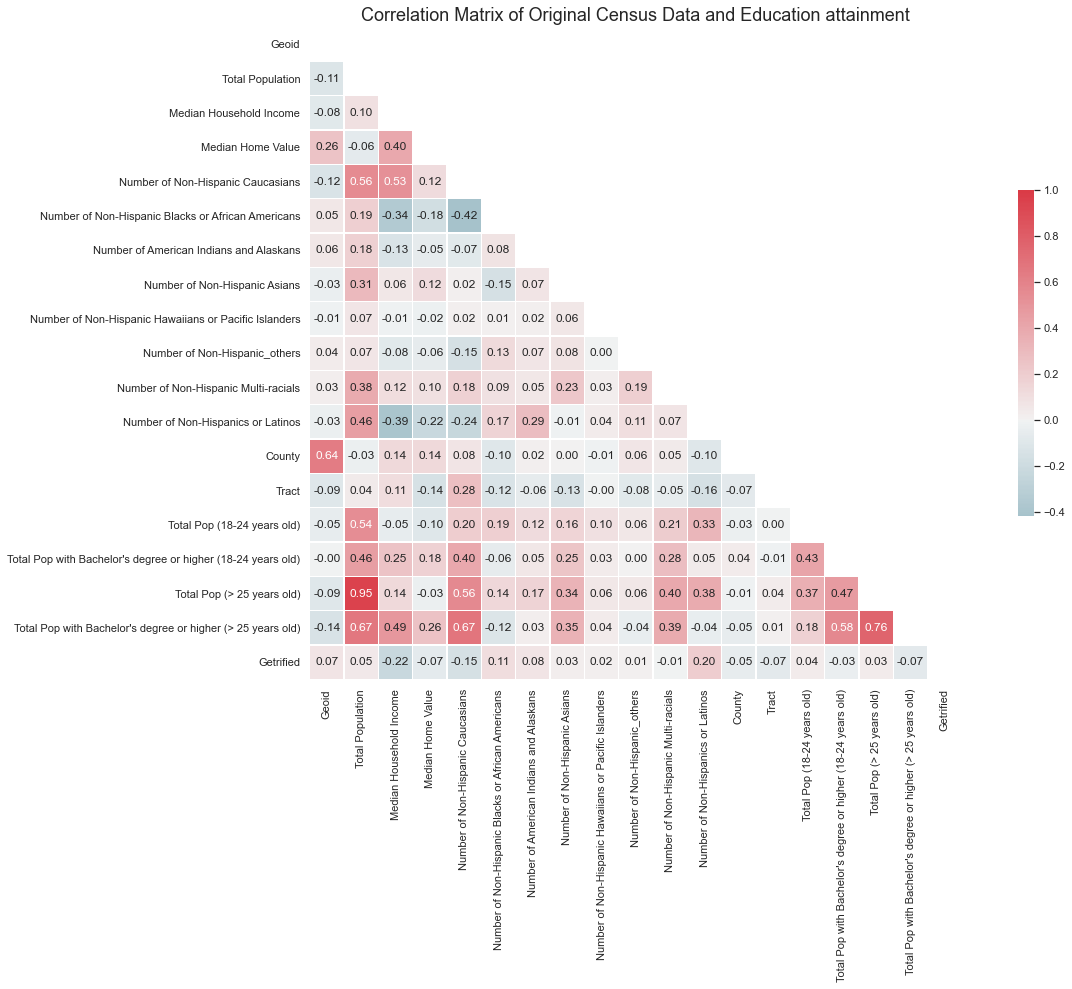

In [47]:
sns.set(style="white")

corr = df_2018.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix of Original Census Data and Education attainment', fontsize=18)

fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [46]:
department_call_2018 = pd.read_csv("F:/Citadel Datathon/Data/department_calls_2018.csv", index_col=0)
department_call_2018 = department_call_2018.reset_index()
department_call_2018.rename(columns={"GEOID":'Geoid'},inplace=True)
department_call_2018

,Geoid,calls_HPD,calls_DOB,calls_NYPD,calls_DEP,calls_DSNY,calls_DPR,calls_TLC,calls_DOHMH,calls_DOT,calls_DOE,calls_DOF,calls_DHS,calls_DCA,calls_DOITT,calls_DFTA,calls_EDC,calls_FDNY
0,3.600504e+10,223,7,97,18,19,3,0,13,7,0,0,1,6,0,0,0,0
1,3.600503e+10,17,8,55,19,78,25,1,8,29,0,2,0,0,0,0,0,0
2,3.604704e+10,332,10,149,23,36,10,2,9,27,0,0,1,1,0,0,0,0
3,3.608110e+10,42,9,53,16,73,20,2,7,36,0,1,1,0,0,0,0,0
4,3.600501e+10,415,21,234,11,15,1,1,11,9,0,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,3.611901e+10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2170,3.606100e+10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2171,3.608500e+10,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2172,3.605940e+10,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


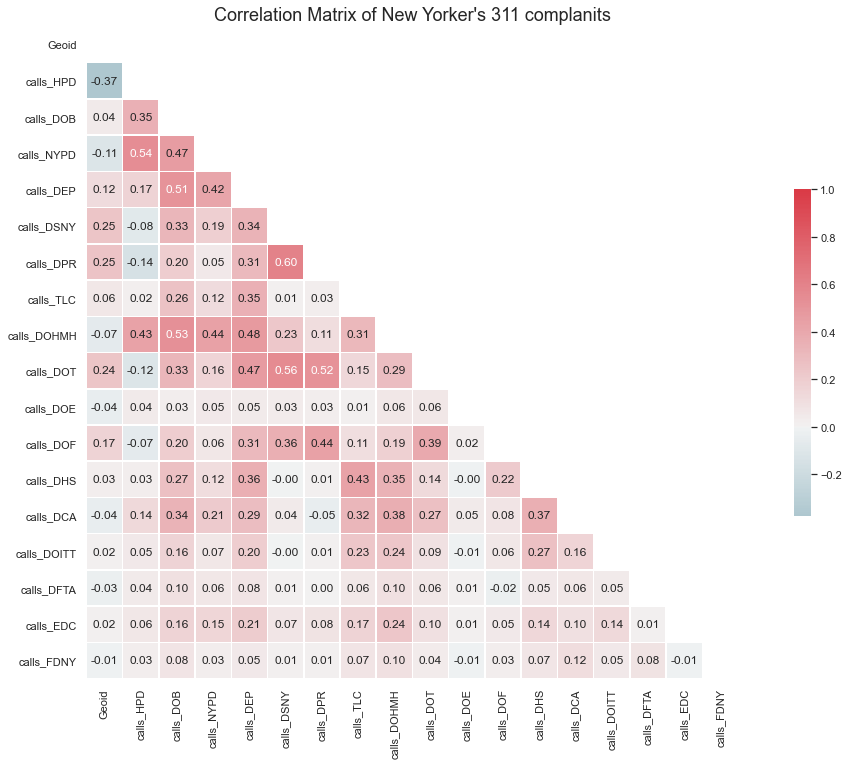

In [48]:
sns.set(style="white")

corr = department_call_2018.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title("Correlation Matrix of New Yorker's 311 complanits" , fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [105]:
ml_2011 = pd.read_csv("F:\Citadel Datathon\Data\ml_2011.csv",index_col=0)
ml_2012 = pd.read_csv("F:\Citadel Datathon\Data\ml_2012.csv",index_col=0)
ml_2013 = pd.read_csv("F:\Citadel Datathon\Data\ml_2013.csv",index_col=0)
ml_2014 = pd.read_csv("F:\Citadel Datathon\Data\ml_2014.csv",index_col=0)
ml_2015 = pd.read_csv("F:\Citadel Datathon\Data\ml_2015.csv",index_col=0)
ml_2016 = pd.read_csv("F:\Citadel Datathon\Data\ml_2016.csv",index_col=0)
ml_2017 = pd.read_csv("F:\Citadel Datathon\Data\ml_2017.csv",index_col=0)
ml_2018 = pd.read_csv("F:\Citadel Datathon\Data\ml_2018.csv",index_col=0)

In [106]:
ml_total = pd.concat([ml_2011, ml_2012, ml_2013,ml_2014,ml_2015,ml_2016,ml_2017,ml_2018])

In [107]:
ml_total.fillna(0, inplace=True)

In [108]:
ml_total.to_csv('ml_total.csv')

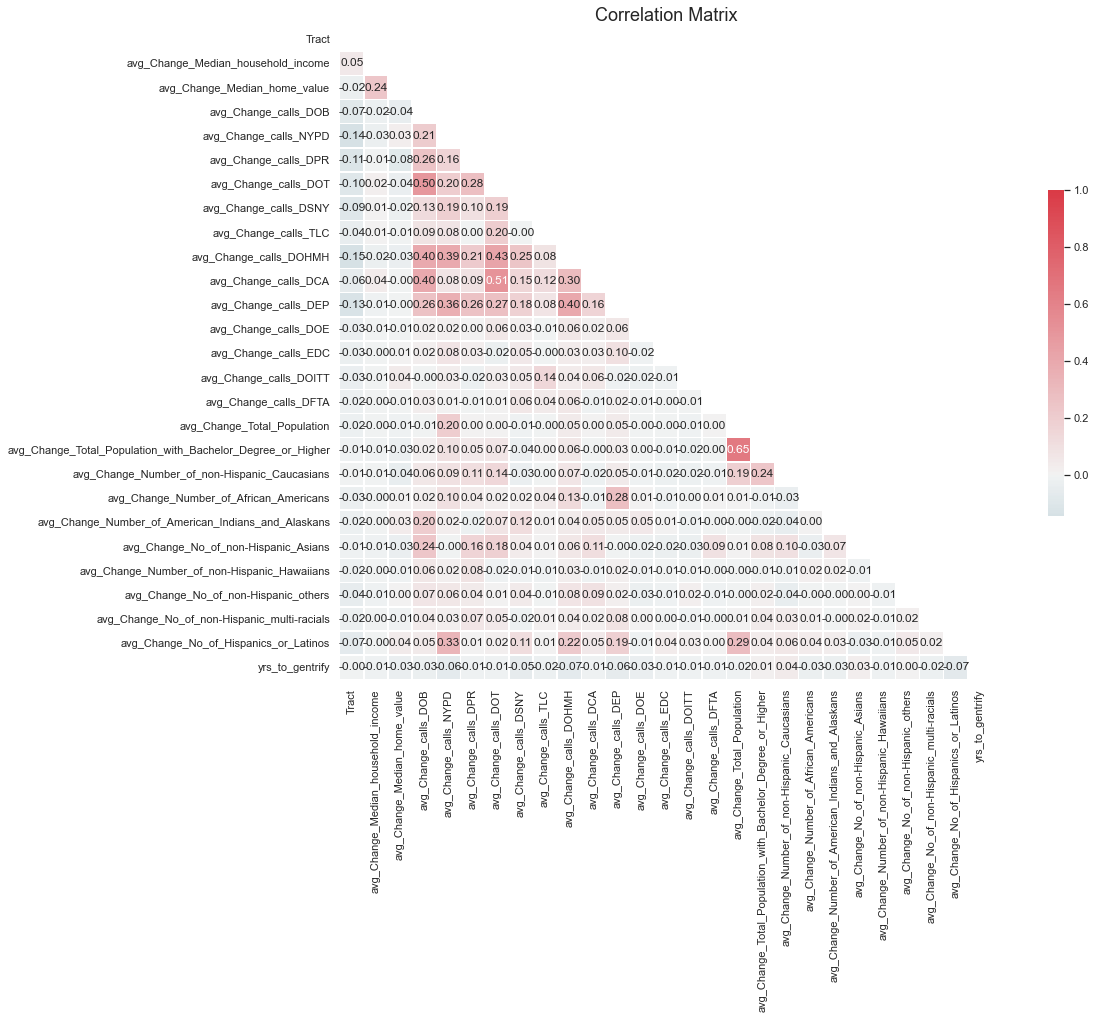

In [109]:
sns.set(style="white")

corr = ml_total.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title("Correlation Matrix" , fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True) 
plt.show()

In [114]:
df_2018 = df_2018.dropna()
df_2018['Geoid'] = df_2018['Geoid'].astype('float')

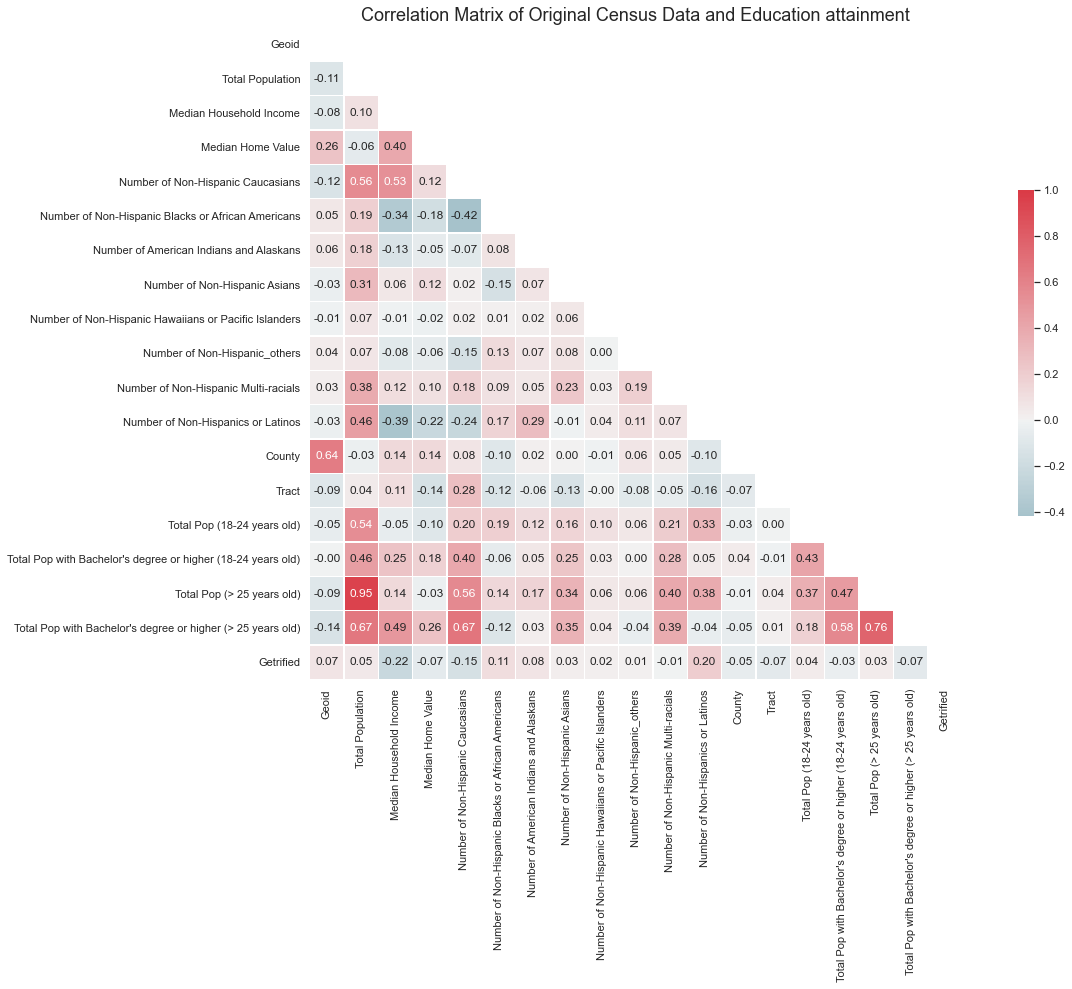

In [115]:
sns.set(style="white")

corr = df_2018.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix of Original Census Data and Education attainment', fontsize=18)

fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [116]:
department_call_2018 = pd.read_csv("F:/Citadel Datathon/Data/department_calls_2018.csv", index_col=0)
department_call_2018 = department_call_2018.reset_index()
department_call_2018.rename(columns={"GEOID":'Geoid'},inplace=True)

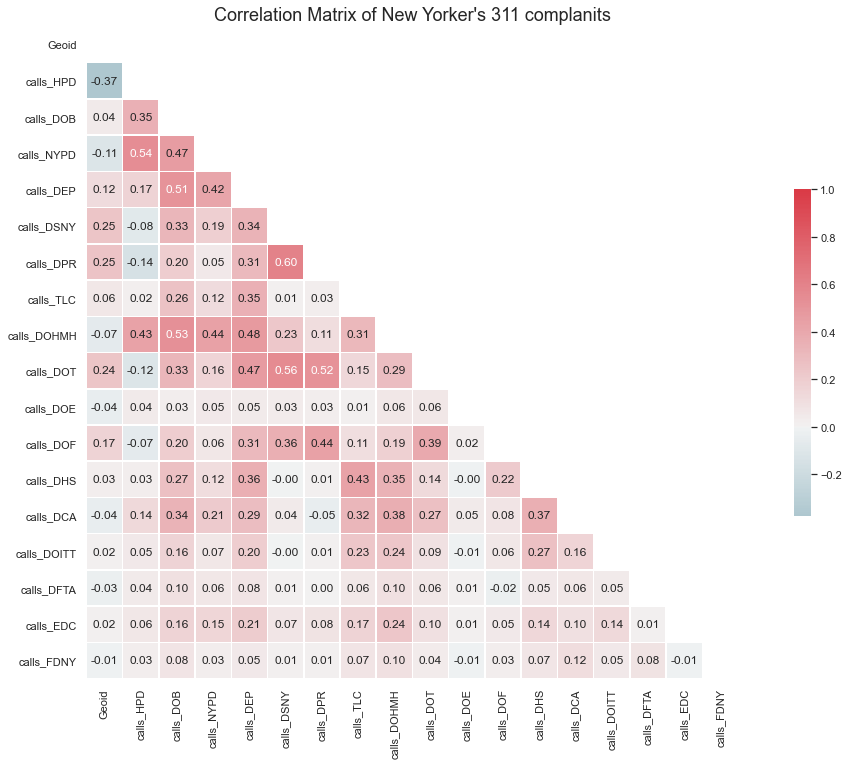

In [117]:
sns.set(style="white")

corr = department_call_2018.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title("Correlation Matrix of New Yorker's 311 complanits" , fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True) 
plt.show()